In [ ]:
# NaN类型的缺失值

In [1]:
import pandas as pd

In [3]:
movie = pd.read_csv("./02-代码/IMDB/IMDB-Movie-Data.csv")

In [8]:
import numpy as np

In [9]:
np.any(pd.isnull(movie))

np.True_

In [10]:
pd.isnull(movie).any()

Rank                  False
Title                 False
Genre                 False
Description           False
Director              False
Actors                False
Year                  False
Runtime (Minutes)     False
Rating                False
Votes                 False
Revenue (Millions)     True
Metascore              True
dtype: bool

In [14]:
data1 = movie.dropna(inplace=False)

In [15]:
pd.isnull(data1).any()

Rank                  False
Title                 False
Genre                 False
Description           False
Director              False
Actors                False
Year                  False
Runtime (Minutes)     False
Rating                False
Votes                 False
Revenue (Millions)    False
Metascore             False
dtype: bool

In [21]:
# 含有缺失值的字段
# Revenue (Millions)    
# Metascore
# movie["Revenue (Millions)"] = movie["Revenue (Millions)"].fillna(movie["Revenue (Millions)"].mean())
# movie["Metascore"] = movie["Metascore"].fillna(movie["Metascore"].mean())

movie.fillna({"Revenue (Millions)": movie["Revenue (Millions)"].mean(),
              "Metascore": movie["Metascore"].mean()}, inplace=True)

In [22]:
pd.isnull(movie).any()

Rank                  False
Title                 False
Genre                 False
Description           False
Director              False
Actors                False
Year                  False
Runtime (Minutes)     False
Rating                False
Votes                 False
Revenue (Millions)    False
Metascore             False
dtype: bool

In [23]:
# 不是缺失值nan，有默认标记的

In [24]:
path = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
name = ["Sample code number", "Clump Thickness", "Uniformity of Cell Size", "Uniformity of Cell Shape", "Marginal Adhesion", "Single Epithelial Cell Size", "Bare Nuclei", "Bland Chromatin", "Normal Nucleoli", "Mitoses", "Class"]


data = pd.read_csv(path, names=name)

In [25]:
data.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [26]:
new_data = data.replace(to_replace="?",value=np.nan)

In [27]:
pd.isnull(new_data).any()

Sample code number             False
Clump Thickness                False
Uniformity of Cell Size        False
Uniformity of Cell Shape       False
Marginal Adhesion              False
Single Epithelial Cell Size    False
Bare Nuclei                     True
Bland Chromatin                False
Normal Nucleoli                False
Mitoses                        False
Class                          False
dtype: bool

In [28]:
new_data.dropna(inplace=True)

In [29]:
new_data.isnull().any()

Sample code number             False
Clump Thickness                False
Uniformity of Cell Size        False
Uniformity of Cell Shape       False
Marginal Adhesion              False
Single Epithelial Cell Size    False
Bare Nuclei                    False
Bland Chromatin                False
Normal Nucleoli                False
Mitoses                        False
Class                          False
dtype: bool

In [30]:
# 数据离散化

In [31]:
# 自动分组

In [32]:
 # 1）准备数据
data = pd.Series([165,174,160,180,159,163,192,184], index=['No1:165', 'No2:174','No3:160', 'No4:180', 'No5:159', 'No6:163', 'No7:192', 'No8:184']) 

In [33]:
data.head()

No1:165    165
No2:174    174
No3:160    160
No4:180    180
No5:159    159
dtype: int64

In [35]:
sr = pd.qcut(data,3)

In [36]:
sr

No1:165      (163.667, 178.0]
No2:174      (163.667, 178.0]
No3:160    (158.999, 163.667]
No4:180        (178.0, 192.0]
No5:159    (158.999, 163.667]
No6:163    (158.999, 163.667]
No7:192        (178.0, 192.0]
No8:184        (178.0, 192.0]
dtype: category
Categories (3, interval[float64, right]): [(158.999, 163.667] < (163.667, 178.0] < (178.0, 192.0]]

In [37]:
sr.value_counts()

(158.999, 163.667]    3
(178.0, 192.0]        3
(163.667, 178.0]      2
Name: count, dtype: int64

In [38]:
pd.get_dummies(sr,prefix="height")

,"height_(158.999, 163.667]","height_(163.667, 178.0]","height_(178.0, 192.0]"
No1:165,False,True,False
No2:174,False,True,False
No3:160,True,False,False
No4:180,False,False,True
No5:159,True,False,False
No6:163,True,False,False
No7:192,False,False,True
No8:184,False,False,True


In [39]:
# 自定义

In [40]:
bins = [150,165,180,195]

In [42]:
sr = pd.cut(data,bins)

In [43]:
sr

No1:165    (150, 165]
No2:174    (165, 180]
No3:160    (150, 165]
No4:180    (165, 180]
No5:159    (150, 165]
No6:163    (150, 165]
No7:192    (180, 195]
No8:184    (180, 195]
dtype: category
Categories (3, interval[int64, right]): [(150, 165] < (165, 180] < (180, 195]]

In [44]:
pd.get_dummies(sr,prefix="height")

,"height_(150, 165]","height_(165, 180]","height_(180, 195]"
No1:165,True,False,False
No2:174,False,True,False
No3:160,True,False,False
No4:180,False,True,False
No5:159,True,False,False
No6:163,True,False,False
No7:192,False,False,True
No8:184,False,False,True


In [45]:
stock = pd.read_csv("./stock_day/stock_day.csv")

In [46]:
p_change = stock["p_change"]

In [47]:
# 自定义分组
bins = [-100, -7, -5, -3, 0, 3, 5, 7, 100]
sr = pd.cut(p_change, bins)

In [48]:
# one-hot
pd.get_dummies(sr, prefix="rise").head()

,"rise_(-100, -7]","rise_(-7, -5]","rise_(-5, -3]","rise_(-3, 0]","rise_(0, 3]","rise_(3, 5]","rise_(5, 7]","rise_(7, 100]"
2018-02-27,False,False,False,False,True,False,False,False
2018-02-26,False,False,False,False,False,True,False,False
2018-02-23,False,False,False,False,True,False,False,False
2018-02-22,False,False,False,False,True,False,False,False
2018-02-14,False,False,False,False,True,False,False,False


In [49]:
stock_change = pd.get_dummies(sr, prefix="rise")

In [50]:
# 合并

In [52]:
pd.concat([stock, stock_change], axis=1).head()

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,...,v_ma20,turnover,"rise_(-100, -7]","rise_(-7, -5]","rise_(-5, -3]","rise_(-3, 0]","rise_(0, 3]","rise_(3, 5]","rise_(5, 7]","rise_(7, 100]"
2018-02-27,23.53,25.88,24.16,23.53,95578.03,0.63,2.68,22.942,22.142,22.875,...,55576.11,2.39,False,False,False,False,True,False,False,False
2018-02-26,22.80,23.78,23.53,22.80,60985.11,0.69,3.02,22.406,21.955,22.942,...,56007.50,1.53,False,False,False,False,False,True,False,False
2018-02-23,22.88,23.37,22.82,22.71,52914.01,0.54,2.42,21.938,21.929,23.022,...,56372.85,1.32,False,False,False,False,True,False,False,False
2018-02-22,22.25,22.76,22.28,22.02,36105.01,0.36,1.64,21.446,21.909,23.137,...,60149.60,0.90,False,False,False,False,True,False,False,False
2018-02-14,21.49,21.99,21.92,21.48,23331.04,0.44,2.05,21.366,21.923,23.253,...,61716.11,0.58,False,False,False,False,True,False,False,False


In [53]:
# pd.merge合并

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


In [54]:
left = pd.DataFrame({'key1': ['K0', 'K0', 'K1', 'K2'],
                        'key2': ['K0', 'K1', 'K0', 'K1'],
                        'A': ['A0', 'A1', 'A2', 'A3'],
                        'B': ['B0', 'B1', 'B2', 'B3']})

right = pd.DataFrame({'key1': ['K0', 'K1', 'K1', 'K2'],
                        'key2': ['K0', 'K0', 'K0', 'K0'],
                        'C': ['C0', 'C1', 'C2', 'C3'],
                        'D': ['D0', 'D1', 'D2', 'D3']})

In [58]:
pd.merge(left,right,how="inner",on=["key1","key2"])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2


In [59]:
pd.merge(left,right,how="left",on=["key1","key2"])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN


In [60]:
# 交叉透视表

In [63]:
date = pd.to_datetime(stock.index)

In [64]:
date.weekday

Index([1, 0, 4, 3, 2, 1, 0, 4, 3, 2,
       ...
       4, 3, 2, 1, 0, 4, 3, 2, 1, 0],
      dtype='int32', length=643)

In [65]:
stock["week"] = date.weekday

In [66]:
stock.head()

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover,week
2018-02-27,23.53,25.88,24.16,23.53,95578.03,0.63,2.68,22.942,22.142,22.875,53782.64,46738.65,55576.11,2.39,1
2018-02-26,22.80,23.78,23.53,22.80,60985.11,0.69,3.02,22.406,21.955,22.942,40827.52,42736.34,56007.50,1.53,0
2018-02-23,22.88,23.37,22.82,22.71,52914.01,0.54,2.42,21.938,21.929,23.022,35119.58,41871.97,56372.85,1.32,4
2018-02-22,22.25,22.76,22.28,22.02,36105.01,0.36,1.64,21.446,21.909,23.137,35397.58,39904.78,60149.60,0.90,3
2018-02-14,21.49,21.99,21.92,21.48,23331.04,0.44,2.05,21.366,21.923,23.253,33590.21,42935.74,61716.11,0.58,2


In [67]:
# 准备涨跌幅数据列
stock["pona"] = np.where(stock["p_change"] > 0, 1, 0)

In [68]:
stock.head()

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover,week,pona
2018-02-27,23.53,25.88,24.16,23.53,95578.03,0.63,2.68,22.942,22.142,22.875,53782.64,46738.65,55576.11,2.39,1,1
2018-02-26,22.80,23.78,23.53,22.80,60985.11,0.69,3.02,22.406,21.955,22.942,40827.52,42736.34,56007.50,1.53,0,1
2018-02-23,22.88,23.37,22.82,22.71,52914.01,0.54,2.42,21.938,21.929,23.022,35119.58,41871.97,56372.85,1.32,4,1
2018-02-22,22.25,22.76,22.28,22.02,36105.01,0.36,1.64,21.446,21.909,23.137,35397.58,39904.78,60149.60,0.90,3,1
2018-02-14,21.49,21.99,21.92,21.48,23331.04,0.44,2.05,21.366,21.923,23.253,33590.21,42935.74,61716.11,0.58,2,1


In [69]:
# 交叉表
data = pd.crosstab(stock["week"], stock["pona"])

In [70]:
data.sum(axis=1)

week
0    125
1    131
2    132
3    128
4    127
dtype: int64

<Axes: xlabel='week'>

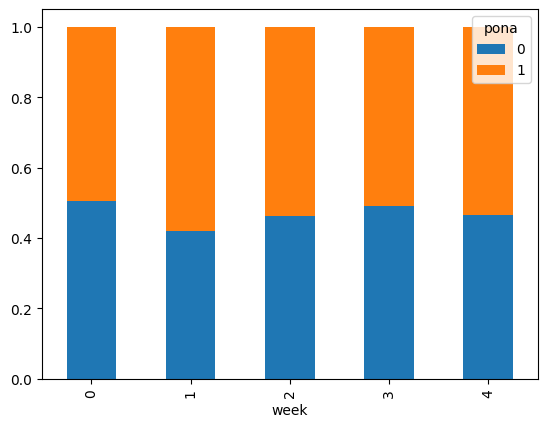

In [71]:
data.div(data.sum(axis=1), axis=0).plot(kind="bar", stacked=True)

In [72]:
# 透视表操作
stock.pivot_table(["pona"], index=["week"])

,pona
week,
0,0.496000
1,0.580153
2,0.537879
3,0.507812
4,0.535433


In [73]:
# 分组与聚合

In [74]:
col =pd.DataFrame({'color': ['white','red','green','red','green'], 'object': ['pen','pencil','pencil','ashtray','pen'],'price1':[5.56,4.20,1.30,0.56,2.75],'price2':[4.75,4.12,1.60,0.75,3.15]})

In [75]:
col.head()

,color,object,price1,price2
0,white,pen,5.56,4.75
1,red,pencil,4.20,4.12
2,green,pencil,1.30,1.60
3,red,ashtray,0.56,0.75
4,green,pen,2.75,3.15


In [79]:

col.groupby(by="color")["price1"].max()

color
green    2.75
red      4.20
white    5.56
Name: price1, dtype: float64

In [80]:
# 1、准备数据
starbucks = pd.read_csv("./02-代码/directory.csv")

In [81]:
starbucks.head()

,Brand,Store Number,Store Name,Ownership Type,Street Address,City,State/Province,Country,Postcode,Phone Number,Timezone,Longitude,Latitude
0,Starbucks,47370-257954,"Meritxell, 96",Licensed,"Av. Meritxell, 96",Andorra la Vella,7,AD,AD500,376818720,GMT+1:00 Europe/Andorra,1.53,42.51
1,Starbucks,22331-212325,Ajman Drive Thru,Licensed,"1 Street 69, Al Jarf",Ajman,AJ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,55.47,25.42
2,Starbucks,47089-256771,Dana Mall,Licensed,Sheikh Khalifa Bin Zayed St.,Ajman,AJ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,55.47,25.39
3,Starbucks,22126-218024,Twofour 54,Licensed,Al Salam Street,Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.38,24.48
4,Starbucks,17127-178586,Al Ain Tower,Licensed,"Khaldiya Area, Abu Dhabi Island",Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.54,24.51


<Axes: xlabel='Country'>

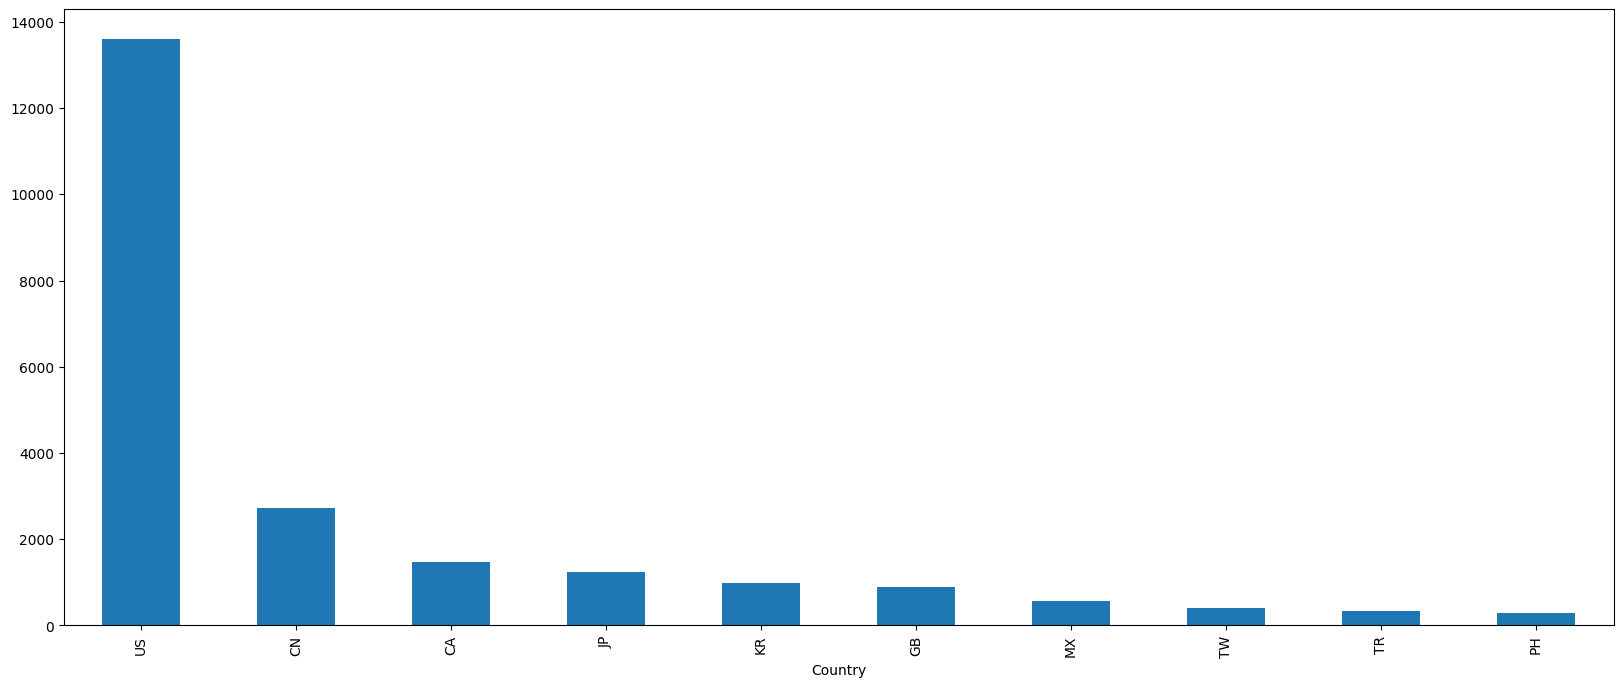

In [86]:
starbucks.groupby(by="Country").count()["Brand"].sort_values(ascending=False)[:10].plot(kind="bar",figsize=(20,8))

In [87]:
# 假设我们加入省市一起进行分组
starbucks.groupby(by=["Country", "State/Province"]).count()

Brand  Store Number  Store Name  Ownership Type  \
Country State/Province                                                    
AD      7                   1             1           1               1   
AE      AJ                  2             2           2               2   
        AZ                 48            48          48              48   
        DU                 82            82          82              82   
        FU                  2             2           2               2   
...                       ...           ...         ...             ...   
US      WV                 25            25          25              25   
        WY                 23            23          23              23   
VN      HN                  6             6           6               6   
        SG                 19            19          19              19   
ZA      GT                  3             3           3               3   

                        Street Address  City  Postcode  Phone Number  \
Country State/Province                                                 
AD      7                            1     1         1             1   
AE      AJ                           2     2         0             0   
        AZ                          48    48         7            20   
        DU                          82    82        16            50   
        FU                           2     2         1             0   
...                                ...   ...       ...           ...   
US      WV                          25    25        25            23   
        WY                          23    23        23            22   
VN      HN                           6     6         6             6   
        SG                          19    19        19            17   
ZA      GT                           3     3         3             2   

                        Timezone  Longitude  Latitude  
Country State/Province                                 
AD      7                      1          1         1  
AE      AJ                     2          2         2  
        AZ                    48         48        48  
        DU                    82         82        82  
        FU                     2          2         2  
...                          ...        ...       ...  
US      WV                    25         25        25  
        WY                    23         23        23  
VN      HN                     6          6         6  
        SG                    19         19        19  
ZA      GT                     3          3         3  

[545 rows x 11 columns]

###  小案例

In [89]:
# 1、准备数据
movie = pd.read_csv("./02-代码/IMDB/IMDB-Movie-Data.csv")

In [90]:
movie.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [91]:
# 评分的平均分
movie["Rating"].mean()

np.float64(6.723199999999999)

In [92]:
# 导演的人数
np.unique(movie["Director"]).size

644

<Axes: ylabel='Frequency'>

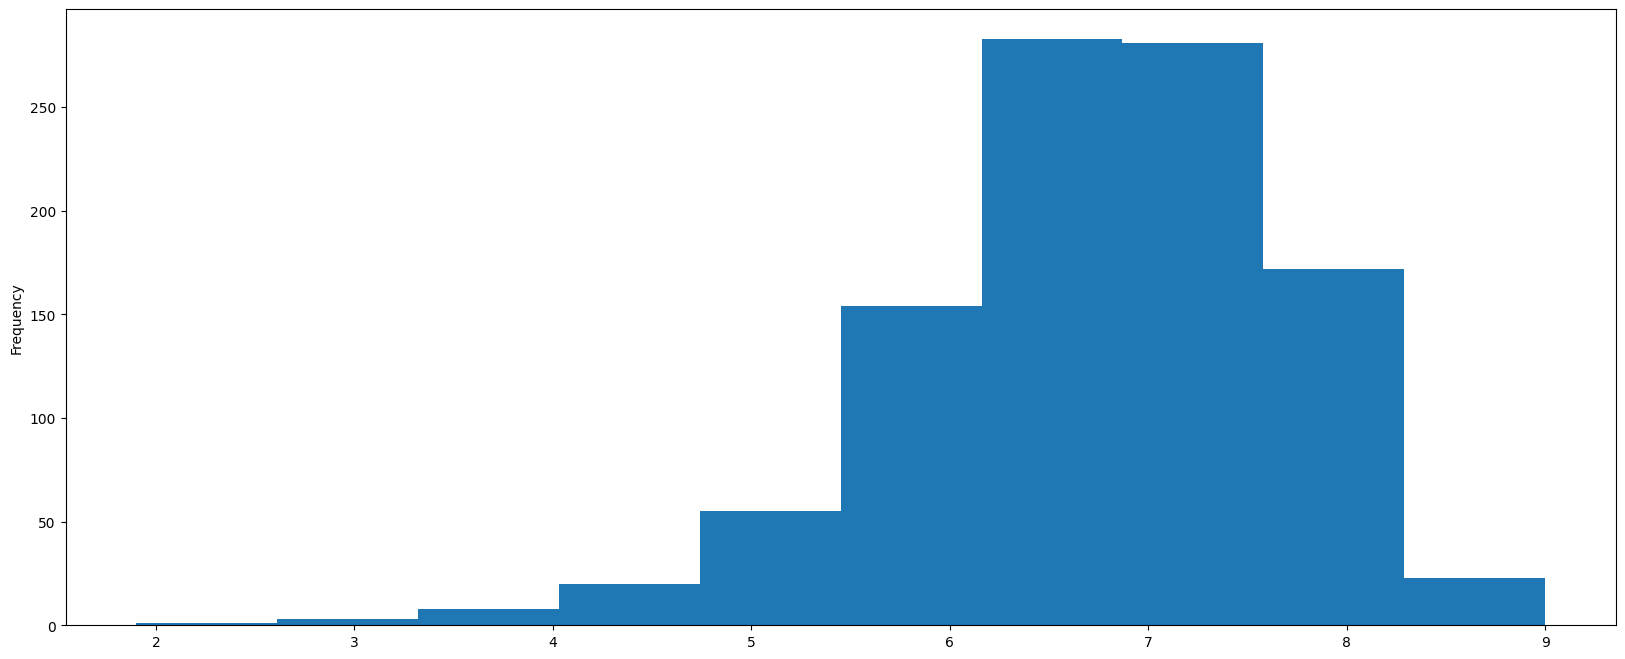

In [93]:
movie["Rating"].plot(kind="hist", figsize=(20, 8))

In [94]:
import matplotlib.pyplot as plt

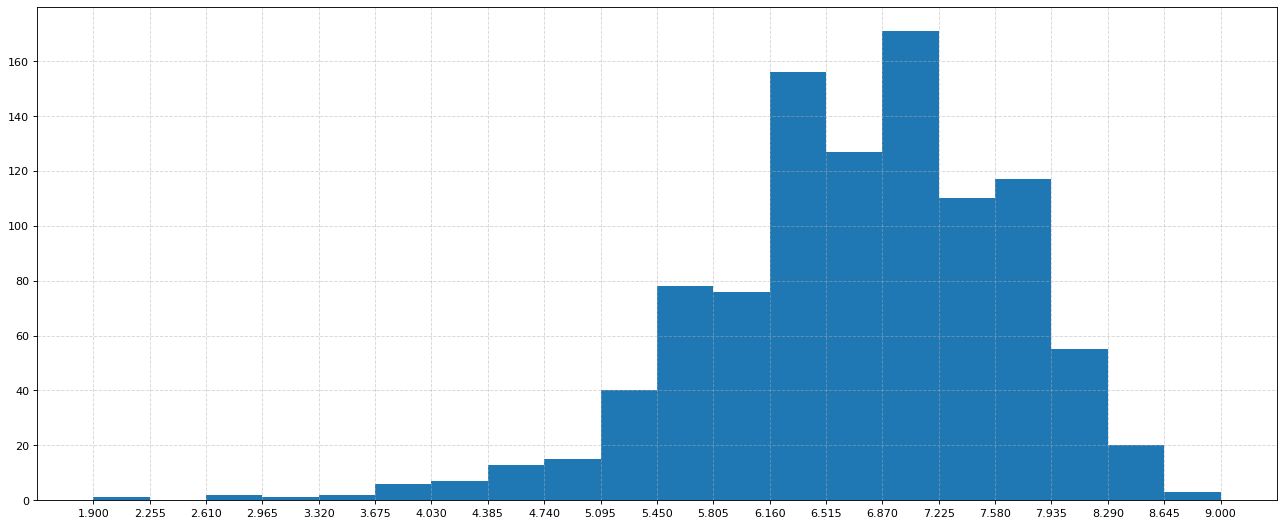

In [95]:
# 1、创建画布
plt.figure(figsize=(20, 8), dpi=80)

# 2、绘制直方图
plt.hist(movie["Rating"], 20)

# 修改刻度
plt.xticks(np.linspace(movie["Rating"].min(), movie["Rating"].max(), 21))

# 添加网格
plt.grid(linestyle="--", alpha=0.5)

# 3、显示图像
plt.show()

In [96]:
    # 问题3：对于这一组电影数据，如果我们希望统计电影分类(genre)的情况，应该如何处理数据？

In [99]:
# 先统计电影类别都有哪些
movie_genre = [i.split(",") for i in movie["Genre"]]

In [106]:
movie_genre

[['Action', 'Adventure', 'Sci-Fi'],
 ['Adventure', 'Mystery', 'Sci-Fi'],
 ['Horror', 'Thriller'],
 ['Animation', 'Comedy', 'Family'],
 ['Action', 'Adventure', 'Fantasy'],
 ['Action', 'Adventure', 'Fantasy'],
 ['Comedy', 'Drama', 'Music'],
 ['Comedy'],
 ['Action', 'Adventure', 'Biography'],
 ['Adventure', 'Drama', 'Romance'],
 ['Adventure', 'Family', 'Fantasy'],
 ['Biography', 'Drama', 'History'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Animation', 'Adventure', 'Comedy'],
 ['Action', 'Comedy', 'Drama'],
 ['Animation', 'Adventure', 'Comedy'],
 ['Biography', 'Drama', 'History'],
 ['Action', 'Thriller'],
 ['Biography', 'Drama'],
 ['Drama', 'Mystery', 'Sci-Fi'],
 ['Adventure', 'Drama', 'Thriller'],
 ['Drama'],
 ['Crime', 'Drama', 'Horror'],
 ['Animation', 'Adventure', 'Comedy'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Comedy'],
 ['Action', 'Adventure', 'Drama'],
 ['Horror', 'Thriller'],
 ['Comedy'],
 ['Action', 'Adventure', 'Drama'],
 ['Comedy'],
 ['Drama', 'Thriller'],
 ['Action', 'Adventure

In [108]:
movie_class = np.unique([j for i in  movie_genre for j in i])

In [109]:
len(movie_class)

20

In [110]:
# 统计每个类别有几个电影
count = pd.DataFrame(np.zeros(shape=[1000, 20], dtype="int32"), columns=movie_class)

In [112]:
# 计数填表
for i in range(1000):
    count.loc[i, movie_genre[i]] = 1

In [113]:
count

,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0
998,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<Axes: >

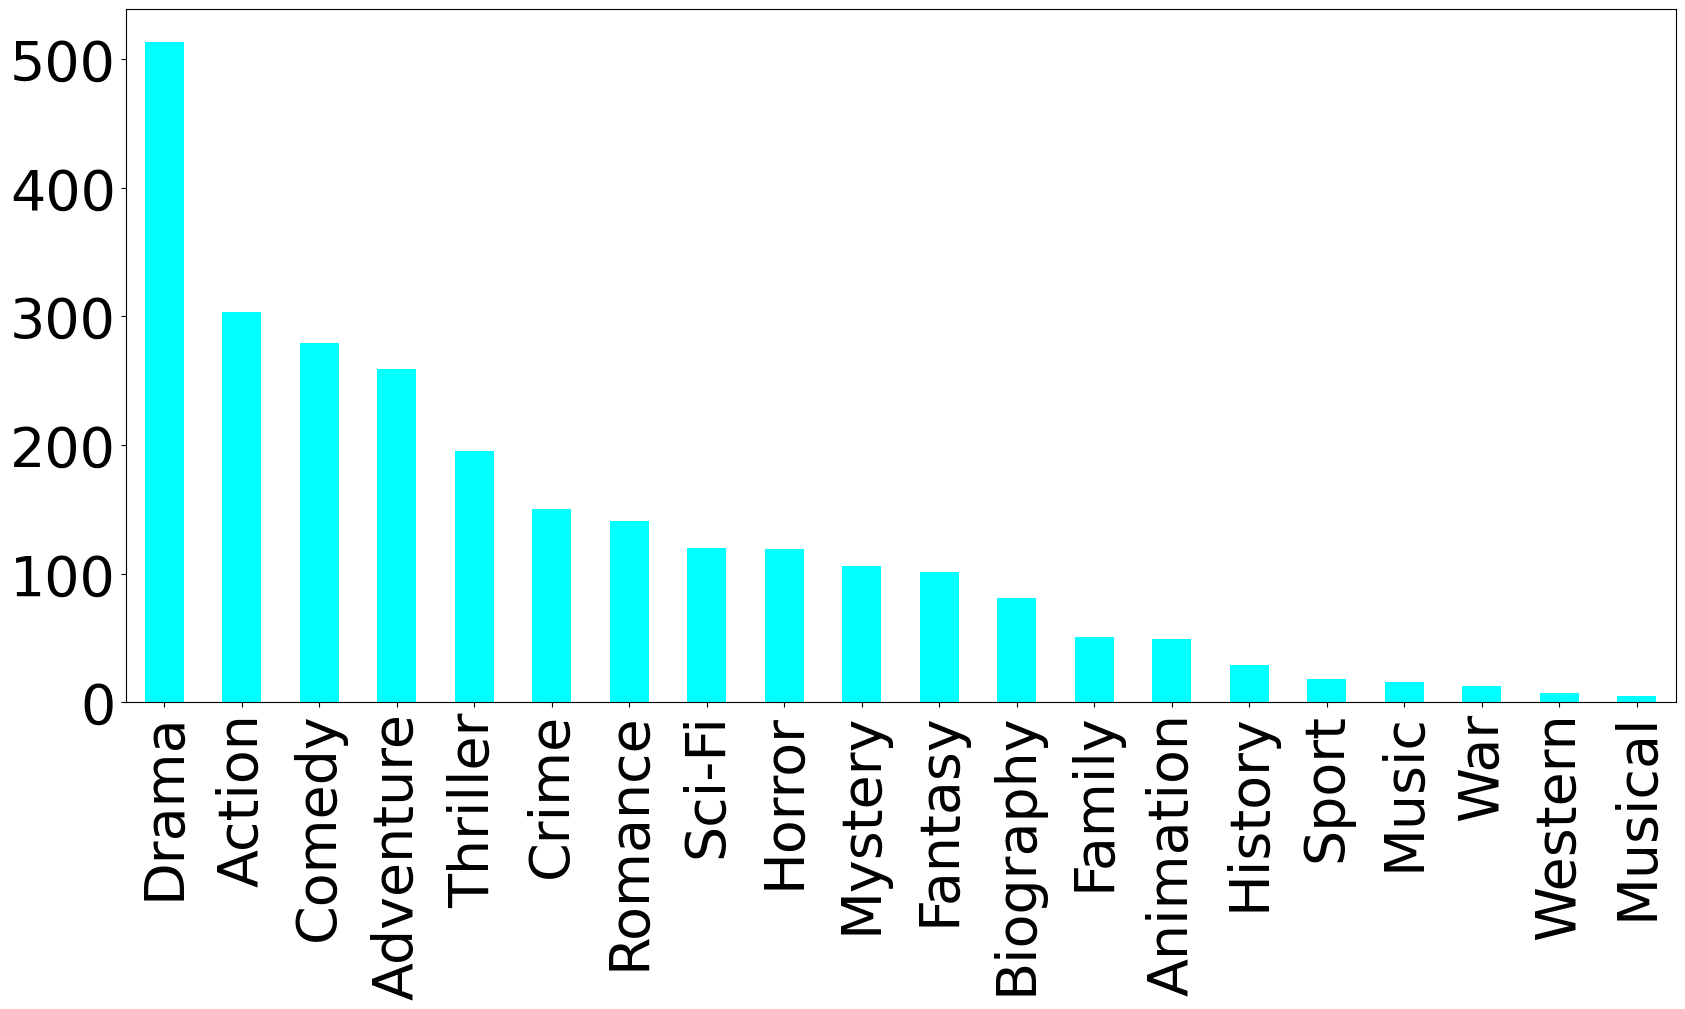

In [115]:
count.sum(axis=0).sort_values(ascending=False).plot(kind="bar", figsize=(20, 9), fontsize=40, colormap="cool")